# Solicitudes a la web

#### Libreria requests

In [3]:
import requests

# El metodo get retorna un objeto de respuesta al intentar
#conectarse a la web
response = requests.get('https://www.platzi.com')

# Se puede obtener metodos para el objeto
# Ver la respuesta
response?
# Codigo fuente
response??
#Ver todos los metodos
print(dir(response))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [7]:
# Retorna el atributo codigo de estado de la respuesta
print(response.status_code)

200


In [11]:
# Retorna metadatos como tipo diccionario
print(response.headers),print(response.headers['date'])

{'Date': 'Thu, 03 Jun 2021 15:45:55 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'CF-Ray': '659a0d1ecdd73714-MIA', 'Access-Control-Allow-Origin': '*', 'Age': '12329', 'Cache-Control': 'no-store', 'Expires': 'Fri, 03 Jun 2022 15:45:55 GMT', 'Strict-Transport-Security': 'max-age=2592000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'CF-Cache-Status': 'HIT', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'X-Requested-With,content-type,X-CSRFToken', 'Access-Control-Allow-Methods': 'GET, POST', 'cf-request-id': '0a7426874100003714438a2000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'X-Content-Type-Options': 'nosniff', 'X-DNS-Prefetch-Control': 'off', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'SAMEORIGIN', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-XSS-Protection': '1; mode=block', 'Server': 'cloudflare', 'C

(None, None)

In [13]:
print(response.text)


      <!DOCTYPE html>
      <html lang=es>
        <head>
          <meta charset="UTF-8">
          
          
    <link rel="canonical" href="https://platzi.com" />
    <link rel="alternate" hreflang="x-default" href="https://platzi.com">
    <link rel="alternate" hreflang="es" href="https://platzi.com">
    <link rel="alternate" hreflang="pt" href="https://platzi.com.br">
    <link rel="alternate" hreflang="en" href="https://courses.platzi.com">
  
          
          <meta name="viewport" content="width=device-width, initial-scale=1" />
          <meta name="referrer" content="no-referrer-when-downgrade">
          <title>Platzi: ‎Cursos Online Profesionales de Tecnología</title>
          <link data-chunk="components-NeverStop-NeverStop-jsx" rel="preload" as="style" href="https://static.platzi.com/mf-landings/assets/components-NeverStop-NeverStop-jsx.9b9d80ee0103f3d15e5b.css">
<link data-chunk="components-Prizes-Prizes-jsx" rel="preload" as="style" href="https://static.platzi.c

# Extracción de información del HTML

#### Libreria Beautifulsoup
Permite analizar gramticamente o parsear el documento html para poder manipularlo programaticamente y podamos consultarlo, por tanto, el documento se convierte en un arbol de nodos, se realizan consultas con selectores css

In [26]:
import bs4
# Se especifica que debe ser de tipo html por que el metodo tambien sirve para
# documentos xml
soup = bs4.BeautifulSoup(response.text,'html.parser')

# Metodo obtener el titulo
print(soup.title.text)

# Metodo selector css
print(soup.select('meta[name=description]')[0]['content'])

Platzi: ‎Cursos Online Profesionales de Tecnología
Aprende desde cero a crear el futuro web con nuestros Cursos Online Profesionales de Tecnología. 🚀¡Cursos de Desarrollo, Diseño, Marketing y Negocios!


In [29]:
# Se selecciona la clase dentro de las etiquetas html
courses_links = soup.select('.SchoolsList-school') 
courses = [course['href'] for course in courses_links]

for course in courses:
    print(course)

/web/
/escuela-javascript/
/idioma-ingles/
/marketing-digital/
/startups/
/publicidad/
/periodismo-digital/
/diseno-producto/
/videojuegos/
/negocios/
/finanzas/
/ecommerce/
/matematicas/
/azure/
/datos/
/diseno-grafico/
/habilidades-blandas/
/software/
/produccion-video/


## Page Object Pattern:

Primero es indispensable entender que los queries se estan realizando con selectores de css, y que así a simple vista tienen un problema el cual es que si se modifica la web, las direcciones donde apunta el querie puede modificarse y romperse por completo el script, por tanto, es importante conocer que es el page object pattern.

Es un patron que viene de las pruebas automatizadas, Consiste en esconder los queries especificos que se utilizan para manipular un documento HTML detras de un objeto que representa la pagina web. por tanto si eres explicito con estos queries y los añades en el codigo principal, se volverá fragil el codigo y será dificil arreglarlo.

### Estructura: Configuración del proyecto.

se crea un archivo config.yaml en donde se define la configuración y su estructura, en este caso se genera un mapa de mapas donde las propiedades de los mapas internos son las que vamos a utilizar.


### Series con Pandas
construcción de vectores unidimensionales asignandole indices con semantica.

In [2]:
import pandas as pd
series_test = pd.Series([1000,2000,3000])
series_test

0    1000
1    2000
2    3000
dtype: int64

In [4]:
series_test1 = pd.Series({
    2000: 48,
    3000: 38,
    4000: 28
})
series_test1

2000    48
3000    38
4000    28
dtype: int64

In [6]:
series_test2 = pd.Series([100,200,300],index=['a','b','c'])
series_test2

a    100
b    200
c    300
dtype: int64

### Dataframe
La estructura es bidimensional, es una matriz, o una lista de listas.
Es una tabla con filas y columnas etiquetadas, con los diccionarios las llaves se convierten en las llaves de acceso a las columnas.

In [7]:
frame_test = pd.DataFrame({1996:[2,3,4,5],
                          2000:[6,7,8,9],
                          2001:[41,23,45,5]})
frame_test

,1996,2000,2001
0,2,6,41
1,3,7,23
2,4,8,45
3,5,9,5


In [11]:
frame_test1 = pd.DataFrame([[2,3,4],[6,7,8],[41,23,45]], columns = [1996,2000,2001])
frame_test1

,1996,2000,2001
0,2,3,4
1,6,7,8
2,41,23,45


## Indices y seleccion de datos
para acceder como las llaves de los diccionarios, se puede pasar el nombre de la columna dentro de parentesis cuadrados.

In [133]:
df = pd.read_csv('eluniversal_2020_04_10_articles.csv',encoding='utf-8')
df

,body,title,url
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",NaN,https://www.viveusa.mx/showbiz/pink-revela-sus...
1,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...
2,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...
3,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...
4,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...
...,...,...,...
134,\nLa iglesia católica en San Luis Potosí afirm...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...
135,"\n""¡Atención! Usted está en una zona prohibida...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...
136,\n\nReuters\n \nHart Island se ha usado histór...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...
137,\n¿No le parece increíble la cantidad de notic...,Puras noticias falsas sobre la 4T,https://www.eluniversal.com.mx/opinion/arlequi...


## Numpy like

In [134]:
df.iloc[1:15] ## Selección de filas

,body,title,url
1,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...
2,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...
3,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...
4,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...
5,\nLuego de más de diez horas de una teleconfer...,México propone recortar 100 mil barriles diari...,https://www.eluniversal.com.mx/cartera/mexico-...
6,\nLa noche de este jueves se lleva a cabo en H...,"Ante audiencia de su agresor, joven saxofonist...",https://www.eluniversal.com.mx/estados/ante-au...
7,Javier citó a Mauricio sobre el Paseo de los C...,NaN,https://www.elgrafico.mx/la-roja/hombre-se-pon...
8,\nAutoridades de Protección Civil del municipi...,Protección Civil en Soledad vigila que balnear...,https://sanluis.eluniversal.com.mx/municipios/...
9,"\nAún con la contingencia, el barrio de Santa ...",Mantienen la fe en la Virgen de los Dolores,https://www.eluniversalqueretaro.mx/portada/ma...
10,\n\nSiempre fue un tema recurrente en nuestras...,La pobreza según Andrés Manuel,https://www.eluniversal.com.mx/opinion/ricardo...


In [135]:
df.iloc[66]['title'] # Filtra la fila 66 pero se especifica la columna

'Carmina Burana y películas desde tu ventana: qué hacer en cuarentena'

In [136]:
df.iloc[:5,0]

0    \n“No sabía si iba a sobrevivir”, dijo la cant...
1    \nEl presidente Andrés Manuel López Obrador in...
2    \nLa Secretaría de Salud confirmó tres nuevos ...
3    \nComo había anunciado ayer, Andrés Manuel Lóp...
4    \nAna Claudia Talancón anda activa promoviendo...
Name: body, dtype: object

In [121]:
df.loc[:,'body':'title']

,body,title
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",NaN
1,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...
2,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...
3,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...
4,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...
...,...,...
134,\nLa iglesia católica en San Luis Potosí afirm...,"Iglesia católica en SLP, con espacios para que..."
135,"\n""¡Atención! Usted está en una zona prohibida...","En Italia, drones detectan a infractores de la..."
136,\n\nReuters\n \nHart Island se ha usado histór...,Coronavirus: los enterramientos en una fosa co...
137,\n¿No le parece increíble la cantidad de notic...,Puras noticias falsas sobre la 4T


## Data Wrangling

Son las actividades mas importantes, el 80% del tiempo se utiliza como domado de datos. desde la ingenieria de datos se realiza como extracción transformación y carga de datos.

In [137]:
1 # Añadir el newspaper_uid

df['newspaper_uid'] = 'eluniversal'
df

,body,title,url,newspaper_uid
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",NaN,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal
1,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...,eluniversal
2,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...,eluniversal
3,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal
4,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...,eluniversal
...,...,...,...,...
134,\nLa iglesia católica en San Luis Potosí afirm...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...,eluniversal
135,"\n""¡Atención! Usted está en una zona prohibida...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...,eluniversal
136,\n\nReuters\n \nHart Island se ha usado histór...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...,eluniversal
137,\n¿No le parece increíble la cantidad de notic...,Puras noticias falsas sobre la 4T,https://www.eluniversal.com.mx/opinion/arlequi...,eluniversal


In [138]:
# 2. obtener el host
from urllib.parse import urlparse

df['host'] = df['url'].apply(lambda x: urlparse(x).netloc) # apply genera transformaciones custom

df

,body,title,url,newspaper_uid,host
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",NaN,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
1,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...,eluniversal,www.eluniversal.com.mx
2,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...,eluniversal,www.eluniversal.com.mx
3,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal,www.eluniversal.com.mx
4,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...,eluniversal,www.eluniversal.com.mx
...,...,...,...,...,...
134,\nLa iglesia católica en San Luis Potosí afirm...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...,eluniversal,sanluis.eluniversal.com.mx
135,"\n""¡Atención! Usted está en una zona prohibida...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...,eluniversal,www.eluniversal.com.mx
136,\n\nReuters\n \nHart Island se ha usado histór...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...,eluniversal,www.eluniversal.com.mx
137,\n¿No le parece increíble la cantidad de notic...,Puras noticias falsas sobre la 4T,https://www.eluniversal.com.mx/opinion/arlequi...,eluniversal,www.eluniversal.com.mx


In [124]:
df['host'].value_counts()

www.eluniversal.com.mx         81
www.viveusa.mx                 14
de10.com.mx                     8
www.elgrafico.mx                6
www.eluniversalqueretaro.mx     5
oaxaca.eluniversal.com.mx       4
sanluis.eluniversal.com.mx      4
www.unionjalisco.mx             3
www.unionguanajuato.mx          3
www.unionedomex.mx              3
www.unionpuebla.mx              3
www.unionyucatan.mx             2
eluniversal.com.mx              1
www.clubeluniversal.mx          1
www.unioncdmx.mx                1
Name: host, dtype: int64

### Preparando la automatización.
En el mundo del data enginiering es necesario automatizar el proceso de tratamiento de datos. se le aplica un scrip con el paso a paso de transformaciones que se van a realizar.

## Datos Faltantes: 
pandas brinda diferentes estrategias 'tradeoffs' para solucionar este problema. 

Se puede eliminar el registro: 
- .isna()
- .notna()
- .dropna()

Para reemplazar el registro.
- .fillna() utiliza un valor sentinela
- .ffill() utiliza el ultimo valor utilizado



In [125]:
filter = df['title'].isna()
df[filter]

,body,title,url,newspaper_uid,host
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",NaN,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
7,Javier citó a Mauricio sobre el Paseo de los C...,NaN,https://www.elgrafico.mx/la-roja/hombre-se-pon...,eluniversal,www.elgrafico.mx
15,0 % PULSO SOCIAL0 Aunque aún existen personas...,NaN,https://de10.com.mx/top-10/2018/01/11/las-10-m...,eluniversal,de10.com.mx
17,\nLas personas que padecen asma son uno de los...,NaN,https://www.viveusa.mx/bienestar/tips-que-debe...,eluniversal,www.viveusa.mx
21,"\nEl Lincoln Center de Nueva York, uno de los ...",NaN,https://www.viveusa.mx/destinos/disfruta-conci...,eluniversal,www.viveusa.mx
22,0 % PULSO SOCIAL0 Es común que los “niños est...,NaN,https://de10.com.mx/top-10/el-antes-y-despues-...,eluniversal,de10.com.mx
23,\nLa modelo y corista Mollie Gould no ha parad...,NaN,https://www.viveusa.mx/showbiz/la-novia-de-lui...,eluniversal,www.viveusa.mx
26,\n¿Volveremos a relacionarnos como antes de la...,NaN,https://www.viveusa.mx/noticias/volveran-los-b...,eluniversal,www.viveusa.mx
30,Él no esperaba que el hombre al que le intenta...,NaN,https://www.elgrafico.mx/la-roja/policia-engan...,eluniversal,www.elgrafico.mx
45,\nEl exceso de alimentos procesados que consum...,NaN,https://www.viveusa.mx/bienestar/los-10-alimen...,eluniversal,www.viveusa.mx


In [144]:
import re

# (df[filter]['url'].str.extract(r'(?P<missing_title>[^/]+)$')
#                       .applymap(lambda x: x.split('-'))
#                       .applymap(lambda x: ' '.join(x)))


# (df[filter]['url'].str.extract(r'(?P<missing_title>[^/]+)$')
#                       .astype(str)
#                       .applymap(lambda x: x.replace('-',' ')))

missing_titles = (df[filter]['url'].str.extract(r'(?P<missing_title>[^/]+)$')
                      .astype(str)
                      .applymap(lambda x: x.replace('-',' '))) # convierte en str y luego reemplaza los - con espacios


df.loc[filter,'title'] = missing_titles.loc[:,'missing_title']


,body,title,url,newspaper_uid,host
0,"\n“No sabía si iba a sobrevivir”, dijo la cant...",pink revela sus momentos mas dificiles al cont...,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
7,Javier citó a Mauricio sobre el Paseo de los C...,hombre se pone nervioso en supuesto asalto y l...,https://www.elgrafico.mx/la-roja/hombre-se-pon...,eluniversal,www.elgrafico.mx
15,0 % PULSO SOCIAL0 Aunque aún existen personas...,las 10 mejores peliculas de la epoca del cine ...,https://de10.com.mx/top-10/2018/01/11/las-10-m...,eluniversal,de10.com.mx
17,\nLas personas que padecen asma son uno de los...,tips que debes seguir ante el coronavirus si t...,https://www.viveusa.mx/bienestar/tips-que-debe...,eluniversal,www.viveusa.mx
21,"\nEl Lincoln Center de Nueva York, uno de los ...",disfruta conciertos y actividades del lincoln ...,https://www.viveusa.mx/destinos/disfruta-conci...,eluniversal,www.viveusa.mx
22,0 % PULSO SOCIAL0 Es común que los “niños est...,el antes y despues de haley joel osment el nin...,https://de10.com.mx/top-10/el-antes-y-despues-...,eluniversal,de10.com.mx
23,\nLa modelo y corista Mollie Gould no ha parad...,la novia de luis miguel posa con su atuendo ma...,https://www.viveusa.mx/showbiz/la-novia-de-lui...,eluniversal,www.viveusa.mx
26,\n¿Volveremos a relacionarnos como antes de la...,volveran los besos y abrazos despues de la pan...,https://www.viveusa.mx/noticias/volveran-los-b...,eluniversal,www.viveusa.mx
30,Él no esperaba que el hombre al que le intenta...,policia engana asaltante y le da su auto pero ...,https://www.elgrafico.mx/la-roja/policia-engan...,eluniversal,www.elgrafico.mx
45,\nEl exceso de alimentos procesados que consum...,los 10 alimentos mas saludables segun la unive...,https://www.viveusa.mx/bienestar/los-10-alimen...,eluniversal,www.viveusa.mx


### Limpieza de datos.

In [145]:
# 4. añadir uid
import hashlib

uids = (df.apply(lambda row: hashlib.md5(bytes(row['url'].encode())) , axis = 1)
        .apply(lambda hash_object: hash_object.hexdigest())
)


df['uid'] = uids
df.set_index('uid',inplace=True) # Aplica los indices ahí mismo

df

,body,title,url,newspaper_uid,host
uid,,,,,
c535ba5517a66a00cf4f2d9a9126c5f4,"\n“No sabía si iba a sobrevivir”, dijo la cant...",pink revela sus momentos mas dificiles al cont...,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
bb17b5a8fc84838945991adb1c86eeca,\nEl presidente Andrés Manuel López Obrador in...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...,eluniversal,www.eluniversal.com.mx
1e272ab81e2c3c796893b40570fd386b,\nLa Secretaría de Salud confirmó tres nuevos ...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...,eluniversal,www.eluniversal.com.mx
078f077b88beab8becd4ea283d00d655,"\nComo había anunciado ayer, Andrés Manuel Lóp...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal,www.eluniversal.com.mx
f10443973e64eb9945d76d3908508911,\nAna Claudia Talancón anda activa promoviendo...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...,eluniversal,www.eluniversal.com.mx
...,...,...,...,...,...
6a89c54ea88a3765c2a7639addede951,\nLa iglesia católica en San Luis Potosí afirm...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...,eluniversal,sanluis.eluniversal.com.mx
4d1081fc01d48c7dd92a0357a726a033,"\n""¡Atención! Usted está en una zona prohibida...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...,eluniversal,www.eluniversal.com.mx
f4490eb370e888bf2513361ab2c9e3a6,\n\nReuters\n \nHart Island se ha usado histór...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...,eluniversal,www.eluniversal.com.mx


In [148]:
stripped_body = (
                    df.apply(lambda row: row['body'],axis = 1)
                    .apply(lambda body: list(body))
                    .apply(lambda letters: list(map(lambda letter: letter.replace('\n',''),letters)))
                    .apply(lambda letters: ''.join(letters))
)

df['body'] = stripped_body


,body,title,url,newspaper_uid,host
uid,,,,,
c535ba5517a66a00cf4f2d9a9126c5f4,"“No sabía si iba a sobrevivir”, dijo la cantan...",pink revela sus momentos mas dificiles al cont...,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
bb17b5a8fc84838945991adb1c86eeca,El presidente Andrés Manuel López Obrador info...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...,eluniversal,www.eluniversal.com.mx
1e272ab81e2c3c796893b40570fd386b,La Secretaría de Salud confirmó tres nuevos fa...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...,eluniversal,www.eluniversal.com.mx
078f077b88beab8becd4ea283d00d655,"Como había anunciado ayer, Andrés Manuel López...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal,www.eluniversal.com.mx
f10443973e64eb9945d76d3908508911,Ana Claudia Talancón anda activa promoviendo a...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...,eluniversal,www.eluniversal.com.mx
...,...,...,...,...,...
6a89c54ea88a3765c2a7639addede951,La iglesia católica en San Luis Potosí afirma ...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...,eluniversal,sanluis.eluniversal.com.mx
4d1081fc01d48c7dd92a0357a726a033,"""¡Atención! Usted está en una zona prohibida. ...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...,eluniversal,www.eluniversal.com.mx
f4490eb370e888bf2513361ab2c9e3a6,Reuters Hart Island se ha usado históricamente...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...,eluniversal,www.eluniversal.com.mx


## Introducción nltk.
Tokenizar el titulo y el body, es decir, dividir en palabras

In [149]:
import nltk
from nltk.corpus import stopwords

In [153]:
stop_words = set(stopwords.words('spanish')) # palabras que no le agregan valor
    
def tokenize_column(df,column_name):
    
    return (df.dropna()
            .apply(lambda row: nltk.word_tokenize(row[column_name]),axis=1)
            .apply(lambda tokens: list(filter(lambda token: token.isalpha(),tokens)))
            .apply(lambda tokens: list(map(lambda token: token.lower(),tokens)))
            .apply(lambda word_list: list(filter(lambda word: word not in stop_words,word_list)))
            .apply(lambda valid_word_list: len(valid_word_list)))

# .apply(lambda tokens: list(filter(lambda token: token.isalpha(),tokens)))

    
a = tokenize_column(df,'title')

TypeError: 'Series' object is not callable

## Eliminar Duplicados.

In [164]:
df['url'].value_counts()

https://www.eluniversal.com.mx/estados/ante-audiencia-de-su-agresor-joven-saxofonista-pide-privilegiar-la-justicia                 2
https://www.eluniversal.com.mx/opinion/carlos-loret-de-mola/no-contamos-con-el-presidente                                          1
https://www.eluniversal.com.mx/nacion/la-mananera-amlo-recuerda-la-muerte-de-cristo-y-la-de-emiliano-zapata                        1
https://www.eluniversal.com.mx/nacion/uso-de-plasma-de-personas-curadas-de-covid-19-aun-en-analisis-experto                        1
https://www.eluniversal.com.mx/nacion/la-mananera-amlo-dice-que-esta-bien-de-salud                                                 1
                                                                                                                                  ..
https://www.eluniversal.com.mx/nacion/coronavirus-falso-toque-de-queda-partir-del-10-de-abril-presidencia                          1
https://www.viveusa.mx/showbiz/carreras-que-la-roca-considero-ejercer

In [165]:
df[df['url']=='https://www.eluniversal.com.mx/estados/ante-audiencia-de-su-agresor-joven-saxofonista-pide-privilegiar-la-justicia']

,body,title,url,newspaper_uid,host
uid,,,,,
83daf25bc385583605083ab9d816b2c8,La noche de este jueves se lleva a cabo en Hua...,"Ante audiencia de su agresor, joven saxofonist...",https://www.eluniversal.com.mx/estados/ante-au...,eluniversal,www.eluniversal.com.mx
83daf25bc385583605083ab9d816b2c8,La noche de este jueves se lleva a cabo en Hua...,"Ante audiencia de su agresor, joven saxofonist...",https://www.eluniversal.com.mx/estados/ante-au...,eluniversal,www.eluniversal.com.mx


In [166]:
df.drop_duplicates(subset=['title'],keep='first',inplace=True)

In [167]:
df

,body,title,url,newspaper_uid,host
uid,,,,,
c535ba5517a66a00cf4f2d9a9126c5f4,"“No sabía si iba a sobrevivir”, dijo la cantan...",pink revela sus momentos mas dificiles al cont...,https://www.viveusa.mx/showbiz/pink-revela-sus...,eluniversal,www.viveusa.mx
bb17b5a8fc84838945991adb1c86eeca,El presidente Andrés Manuel López Obrador info...,México acuerda con OPEP reducir en 100 mil bar...,https://www.eluniversal.com.mx/nacion/amlo-mex...,eluniversal,www.eluniversal.com.mx
1e272ab81e2c3c796893b40570fd386b,La Secretaría de Salud confirmó tres nuevos fa...,Fallecen tres personas más por coronavirus en ...,https://www.eluniversal.com.mx/estados/fallece...,eluniversal,www.eluniversal.com.mx
078f077b88beab8becd4ea283d00d655,"Como había anunciado ayer, Andrés Manuel López...",AMLO dice que envió listado al CCE de los 15 g...,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal,www.eluniversal.com.mx
f10443973e64eb9945d76d3908508911,Ana Claudia Talancón anda activa promoviendo a...,Ana Claudia Talancón promueve el sazón de su p...,https://www.eluniversal.com.mx/espectaculos/fa...,eluniversal,www.eluniversal.com.mx
...,...,...,...,...,...
6a89c54ea88a3765c2a7639addede951,La iglesia católica en San Luis Potosí afirma ...,"Iglesia católica en SLP, con espacios para que...",https://sanluis.eluniversal.com.mx/sociedad/08...,eluniversal,sanluis.eluniversal.com.mx
4d1081fc01d48c7dd92a0357a726a033,"""¡Atención! Usted está en una zona prohibida. ...","En Italia, drones detectan a infractores de la...",https://www.eluniversal.com.mx/mundo/covid-19-...,eluniversal,www.eluniversal.com.mx
f4490eb370e888bf2513361ab2c9e3a6,Reuters Hart Island se ha usado históricamente...,Coronavirus: los enterramientos en una fosa co...,https://www.eluniversal.com.mx/mundo/coronavir...,eluniversal,www.eluniversal.com.mx


## Analisis descriptivo:

In [169]:
df_1 = pd.read_csv('clean_eluniversal_2020_04_10_articles.csv')

In [171]:
df_1.describe() # Solo variables numericas

,n_tokens_title,n_tokens_body
count,138.000000,138.000000
mean,6.181159,265.833333
std,1.817335,202.554510
min,1.000000,9.000000
25%,5.000000,131.000000
50%,6.000000,210.000000
75%,7.000000,332.250000
max,11.000000,1040.000000


<AxesSubplot:>

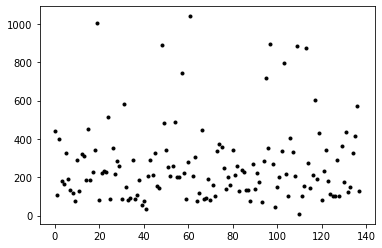

In [172]:
df_1['n_tokens_body'].plot(style='k.')

newspaper_uid
eluniversal    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

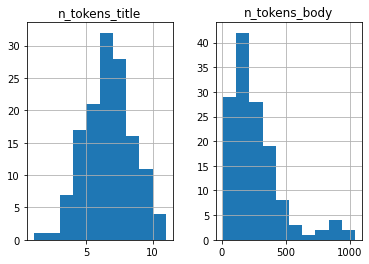

In [176]:
all_news = pd.concat([df_1])
grouped = all_news.groupby('newspaper_uid')

grouped.hist()

In [178]:
grouped['n_tokens_body'].agg(['min','mean','max'])

,min,mean,max
newspaper_uid,,,
eluniversal,9,265.833333,1040


newspaper_uid
eluniversal    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

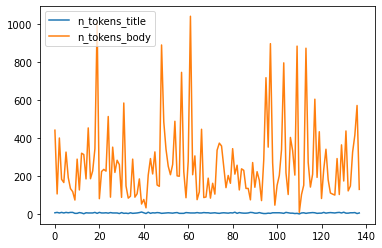

In [179]:
grouped.plot()

## Procesamiento en Bloque y en Chorro
en bloque: Hablamos de datos historicos, cosas que ya sucedieron, ¿Que fue lo que sucedio?

en chorro: es lo mismo que el streaming porque apenas van llegando los datos se van procesando.

para determinar cual usar se tiene que preguntar ¿Cual es el valor de una decisión temprana?



### SQL y NoSQL
Data estructurada y no solamente estructurada.